## **Importing Libraries**

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

In [2]:
# from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.manifold import TSNE
# from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
# from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
# from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [4]:
import nltk
from utils import *
from scipy.cluster.hierarchy import linkage, dendrogram


## **Reading 20 Newsgroups Dataset**

In [5]:
# Selected 3 categories from the 20 newsgroups dataset

categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [6]:
News_df = fetch_20newsgroups(subset='all', categories=categories, 
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

In [7]:
News_df.data[0]

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

In [8]:
News_df.target

array([1, 0, 1, ..., 0, 0, 1])

## **Redaing PeopleWiki Datset**

In [9]:
#We will retrieve the Wikipedia Articles Dataset
dataset = 'Dataset/people_wiki.csv'
people_wiki_df = pd.read_csv(dataset)
#Lets see what we have in the dataset
people_wiki_df.head(3)

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...


##  Looking at raw texts 


In [10]:
print(News_df.data[0])



I think I can. Largely as a result of efforts by people reading this group
writing letters and making phone calls the following has happened:

1. NASA reprogrammed funds to keep NASP alive in 1991.
2. Efforts to kill DC-X and the SSRT progam where twice twarted
   (Feb. and June of last year).
3. Gouldin kept his job in spite of heavy lobbying against him.

This may not be what Mark was thinking of but it shows that the
readers of sci.space DO have power and influence.

  Allen



In [11]:
len(News_df.data)

2588

In [12]:
News_sample = News_df.data[0]

In [13]:
News_sample

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/israa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/israa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
# remove old style retweet text "RT"
News_sample2 = re.sub(r'^RT[\s]+', '', News_sample)

# remove hyperlinks
News_sample2 = re.sub(r'https?://[^\s\n\r]+', '', News_sample2)

# remove hashtags
# only removing the hash # sign from the word
News_sample2 = re.sub(r'#', '', News_sample2)

print(News_sample2)



I think I can. Largely as a result of efforts by people reading this group
writing letters and making phone calls the following has happened:

1. NASA reprogrammed funds to keep NASP alive in 1991.
2. Efforts to kill DC-X and the SSRT progam where twice twarted
   (Feb. and June of last year).
3. Gouldin kept his job in spite of heavy lobbying against him.

This may not be what Mark was thinking of but it shows that the
readers of sci.space DO have power and influence.

  Allen



In [17]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
News_sample2_tokens = tokenizer.tokenize(News_sample2)

print('Tokenized string:')
print(News_sample2_tokens)

Tokenized string:
['i', 'think', 'i', 'can', '.', 'largely', 'as', 'a', 'result', 'of', 'efforts', 'by', 'people', 'reading', 'this', 'group', 'writing', 'letters', 'and', 'making', 'phone', 'calls', 'the', 'following', 'has', 'happened', ':', '1', '.', 'nasa', 'reprogrammed', 'funds', 'to', 'keep', 'nasp', 'alive', 'in', '1991', '.', '2', '.', 'efforts', 'to', 'kill', 'dc-x', 'and', 'the', 'ssrt', 'progam', 'where', 'twice', 'twarted', '(', 'feb', '.', 'and', 'june', 'of', 'last', 'year', ')', '.', '3', '.', 'gouldin', 'kept', 'his', 'job', 'in', 'spite', 'of', 'heavy', 'lobbying', 'against', 'him', '.', 'this', 'may', 'not', 'be', 'what', 'mark', 'was', 'thinking', 'of', 'but', 'it', 'shows', 'that', 'the', 'readers', 'of', 'sci.space', 'do', 'have', 'power', 'and', 'influence', '.', 'allen']


### stopwords english overview

In [18]:
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "s

In [19]:
print('\033[92m')
print(News_sample2_tokens)
print('\033[94m')

tweets_clean = []

for word in News_sample2_tokens: 
    if (word not in stopwords_english and  word not in string.punctuation):  
        tweets_clean.append(word)

print("After removing stop words and punctuation:")
print(tweets_clean)


['i', 'think', 'i', 'can', '.', 'largely', 'as', 'a', 'result', 'of', 'efforts', 'by', 'people', 'reading', 'this', 'group', 'writing', 'letters', 'and', 'making', 'phone', 'calls', 'the', 'following', 'has', 'happened', ':', '1', '.', 'nasa', 'reprogrammed', 'funds', 'to', 'keep', 'nasp', 'alive', 'in', '1991', '.', '2', '.', 'efforts', 'to', 'kill', 'dc-x', 'and', 'the', 'ssrt', 'progam', 'where', 'twice', 'twarted', '(', 'feb', '.', 'and', 'june', 'of', 'last', 'year', ')', '.', '3', '.', 'gouldin', 'kept', 'his', 'job', 'in', 'spite', 'of', 'heavy', 'lobbying', 'against', 'him', '.', 'this', 'may', 'not', 'be', 'what', 'mark', 'was', 'thinking', 'of', 'but', 'it', 'shows', 'that', 'the', 'readers', 'of', 'sci.space', 'do', 'have', 'power', 'and', 'influence', '.', 'allen']

After removing stop words and punctuation:
['think', 'largely', 'result', 'efforts', 'people', 'reading', 'group', 'writing', 'letters', 'making', 'phone', 'calls', 'following', 'happened', '1', 'nasa', 'reprog

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.

In [20]:
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
News_sample2_tokens_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    News_sample2_tokens_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(News_sample2_tokens_stem)


['think', 'largely', 'result', 'efforts', 'people', 'reading', 'group', 'writing', 'letters', 'making', 'phone', 'calls', 'following', 'happened', '1', 'nasa', 'reprogrammed', 'funds', 'keep', 'nasp', 'alive', '1991', '2', 'efforts', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twarted', 'feb', 'june', 'last', 'year', '3', 'gouldin', 'kept', 'job', 'spite', 'heavy', 'lobbying', 'may', 'mark', 'thinking', 'shows', 'readers', 'sci.space', 'power', 'influence', 'allen']

stemmed words:
['think', 'larg', 'result', 'effort', 'peopl', 'read', 'group', 'write', 'letter', 'make', 'phone', 'call', 'follow', 'happen', '1', 'nasa', 'reprogram', 'fund', 'keep', 'nasp', 'aliv', '1991', '2', 'effort', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twart', 'feb', 'june', 'last', 'year', '3', 'gouldin', 'kept', 'job', 'spite', 'heavi', 'lobbi', 'may', 'mark', 'think', 'show', 'reader', 'sci.spac', 'power', 'influenc', 'allen']


In [21]:
News_df.target

array([1, 0, 1, ..., 0, 0, 1])

In [22]:
# process the whole dataset of News_df
News_df_clean = []
for tweet in News_df.data:
    News_df_clean.append(process_tweet(tweet))

In [23]:
print(News_df_clean[0])

['think', 'largely', 'result', 'effort', 'people', 'reading', 'group', 'writing', 'letter', 'making', 'phone', 'call', 'following', 'happened', 'nasa', 'reprogrammed', 'fund', 'keep', 'nasp', 'alive', '.\n.', 'effort', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twarted', 'feb', 'june', 'last', 'year', '.\n.', 'gouldin', 'kept', 'job', 'spite', 'heavy', 'lobbying', 'may', 'mark', 'thinking', 'show', 'reader', 'sci.space', 'power', 'influence', 'allen']


In [24]:
print(News_df_clean[1000])

['hello', 'netters', 'finally', 'received', 'information', 'imagine', 'pc', 'presently', 'shipping', 'version', 'software', 'release', 'version', 'first', 'quarter', 'say', 'upgrade', '..', 'purchase', 'imagine', 'cost', 'upgrading', 'another', 'eligible', 'call', 'info', 'modeler', 'plus', 'shipping', 'handling', 'requires', 'pc', 'meg', 'math', 'coprocessor', 'do', 'microsoft', 'mouse', 'svga', 'card', 'thanks', 'reply', 'product', 'received', 'many', 'contrasting', 'reply', 'scrounge', 'money', 'together', 'think', 'take', 'plunge', 'thanks', 'info', 'impulse', 'want', 'find', 'get', 'sheet', 'sent', 'impulse', 'inc', 'xerxes', 'avenue', 'north', 'minneapolis', 'mn', 'thanks', 'reply', 'scott', 'scott', 'snowiss', 'sasst', 'pitt.edu']


In [25]:
type(News_df_clean)

list

In [26]:
type(News_df)

sklearn.utils._bunch.Bunch

## First method

In [27]:
K = 4

In [28]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

X = vectorizer.fit_transform(News_df.data)

y_true = np.array(News_df.target)

In [29]:
print(X.shape)

(2588, 1000)


In [30]:
normalizer = Normalizer()

X_normalized = normalizer.fit_transform(X)

In [31]:
model = KMeans(n_clusters=K, init='k-means++', max_iter=1000, n_init=100, random_state=42)

model.fit(X_normalized)

KMeans(max_iter=1000, n_clusters=4, n_init=100, random_state=42)

In [32]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(K):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind])


Top terms per cluster:
Cluster 0:
 just
 think
 don
 like
 people
 know
 time
 good
 ve
 does
 way
 say
 did
 want
 make
 going
 right
 new
 point
 question
 use
 things
 actually
 maybe
 long
 problem
 read
 sure
 better
 really
Cluster 1:
 thanks
 graphics
 file
 image
 files
 know
 format
 program
 help
 looking
 does
 edu
 ftp
 gif
 hi
 need
 like
 use
 advance
 mail
 software
 3d
 images
 windows
 bit
 code
 available
 information
 computer
 color
Cluster 2:
 god
 jesus
 christian
 people
 bible
 christians
 christ
 believe
 did
 life
 man
 don
 say
 faith
 kent
 love
 children
 know
 religion
 right
 think
 christianity
 good
 church
 heaven
 does
 just
 word
 said
 lord
Cluster 3:
 space
 nasa
 shuttle
 launch
 hst
 orbit
 station
 mission
 earth
 program
 like
 cost
 moon
 lunar
 satellite
 sci
 think
 just
 gov
 don
 long
 time
 data
 use
 year
 know
 new
 solar
 satellites
 science


In [33]:
print("Silhouette Score: %0.3f" % metrics.silhouette_score(X_normalized, model.labels_, sample_size=1000))

Silhouette Score: 0.013


In [34]:
# Calculate the purity score
purity = purity_score(y_true, model.labels_)
print("Purity Score: %0.3f" % purity)

Purity Score: 0.694


### Visualization

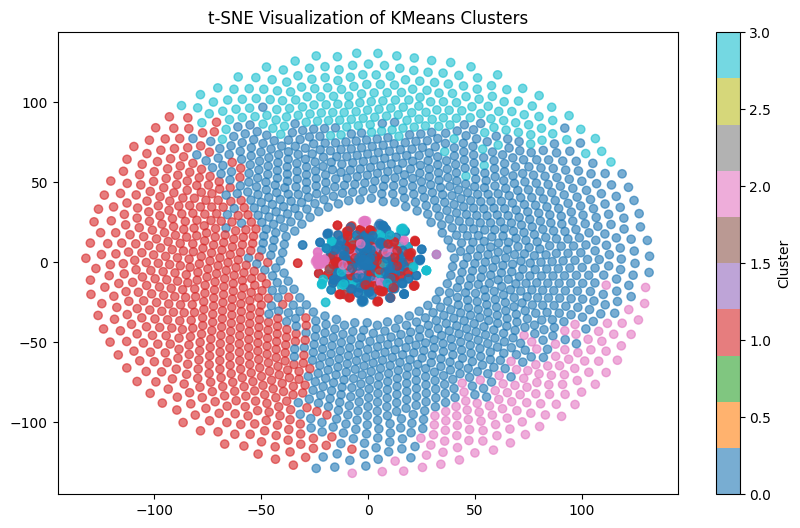

In [35]:
tsne_cluster_visualization(X= X, model= model)

### Elbow Method to find optimal clusters

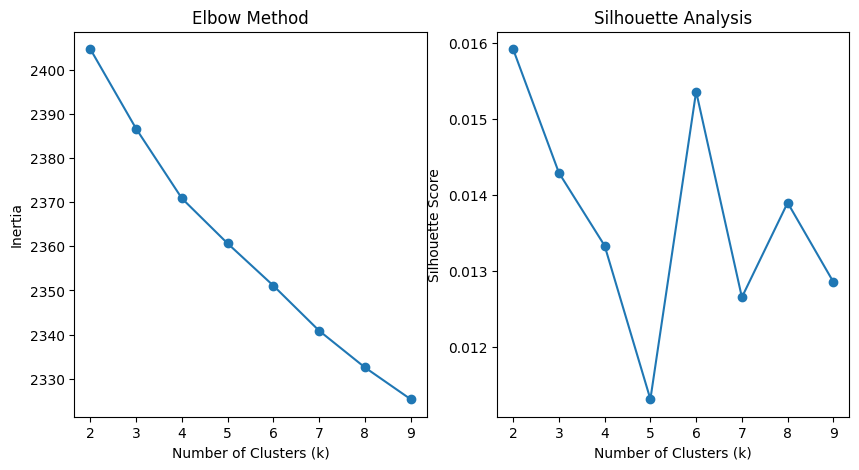

In [36]:
plot_elbow_and_silhouette(X_normalized)

In [37]:
hierarchical_clustering_dendrogram(X= X_normalized)

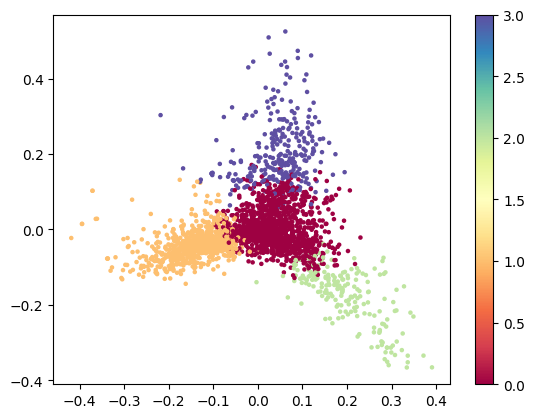

In [98]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X_normalized.toarray())  # Convert sparse to dense if needed

# Scatter plot of PCA result
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=model.labels_, cmap='Spectral', s=5)
plt.colorbar()
plt.show()


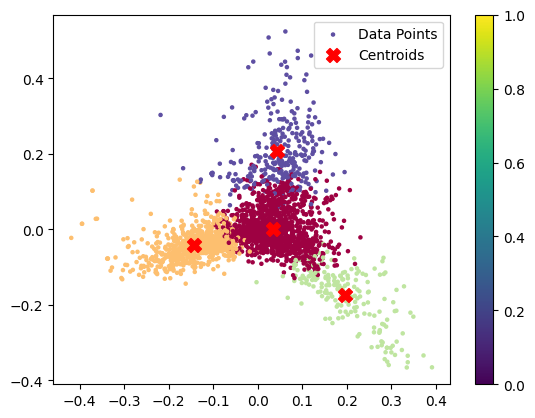

In [99]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X_normalized.toarray())  # Convert sparse to dense if needed

# Transform centroids using PCA
centroids_embedded = pca.transform(model.cluster_centers_)

# Scatter plot of PCA result
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=model.labels_, cmap='Spectral', s=5, label="Data Points")

# Plot centroids
plt.scatter(centroids_embedded[:, 0], centroids_embedded[:, 1], c='red', marker='X', s=100, label="Centroids")

plt.colorbar()
plt.legend()
plt.show()


## Second Method

In [38]:
print(type(News_df_clean))  # Should be <class 'list'>
print(type(News_df_clean[0]))  # Should be <class 'str'>


<class 'list'>
<class 'list'>


In [39]:
News_df_clean_2 = [" ".join(words) if isinstance(words, list) else str(words) for words in News_df_clean]
print(News_df_clean_2[0])  # Should be <class 'str'>


think largely result effort people reading group writing letter making phone call following happened nasa reprogrammed fund keep nasp alive .
. effort kill dc-x ssrt progam twice twarted feb june last year .
. gouldin kept job spite heavy lobbying may mark thinking show reader sci.space power influence allen


In [40]:
vectorizer_2 = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(3,3))

X_2 = vectorizer_2.fit_transform(News_df_clean_2)

y_true_2 = np.array(News_df.target)


In [41]:
print(X_2.shape)    

(2588, 1000)


In [42]:
K_2 = 10

In [43]:
normalizer_2 = Normalizer()

X_normalized_2 = normalizer_2.fit_transform(X_2)

In [44]:
model_2 = KMeans(n_clusters=K_2, init='k-means++', max_iter=1000, n_init=100, random_state=42)

model_2.fit(X_normalized_2)

KMeans(max_iter=1000, n_clusters=10, n_init=100, random_state=42)

In [45]:
print("Top terms per cluster:")

order_centroids = model_2.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer_2.get_feature_names_out()

for i in range(K_2):

    print("Cluster %d:" % i),

    for ind in order_centroids[i, :30]:

        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 help greatly appreciated
 gamma ray burster
 available anonymous ftp
 vnet ibm com
 hidden line removal
 jpl nasa gov
 pluto fast flyby
 wuarchive wustl edu
 lord jesus christ
 space station redesign
 taking quote context
 larc nasa gov
 long time ago
 ___ ___ ___
 san jose ca
 alt binaries pictures
 earth magnetic field
 arc nasa gov
 space technology investor
 thanks advance help
 european space agency
 command loss timer
 talk religion misc
 vesa local bus
 right dark sky
 status report april
 gamma ray burst
 world std com
 kuiper belt object
 red green blue
Cluster 1:
 shuttle program office
 space shuttle program
 nasa jsc gm
 jsc gm space
 gm space shuttle
 jsc nasa gov
 kjenks gothamcity jsc
 gothamcity jsc nasa
 jenks nasa jsc
 ken jenks nasa
 office kjenks gothamcity
 program office kjenks
 shuttle external tank
 enet dec com
 verga enet dec
 klaes verga enet
 cso uiuc edu
 shuttle main engine
 ftp ames arc
 baalke baalke kelvin
 ron baalke 

In [46]:
print("Silhouette Score: %0.3f" % metrics.silhouette_score(X_normalized_2, model_2.labels_, sample_size=1000))

Silhouette Score: 0.751


In [47]:
print("Purity Score: %0.3f" % purity_score(y_true_2, model_2.labels_))

Purity Score: 0.405


### Visualization

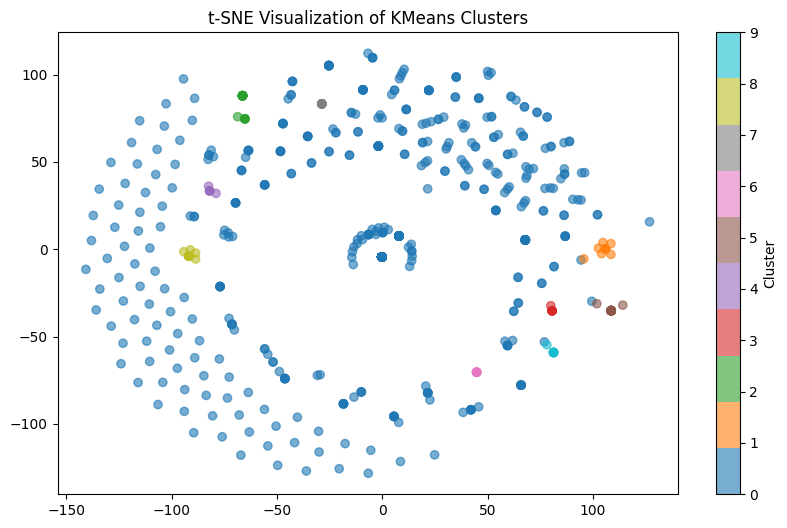

In [48]:
tsne_cluster_visualization(X= X_normalized_2, model= model_2)

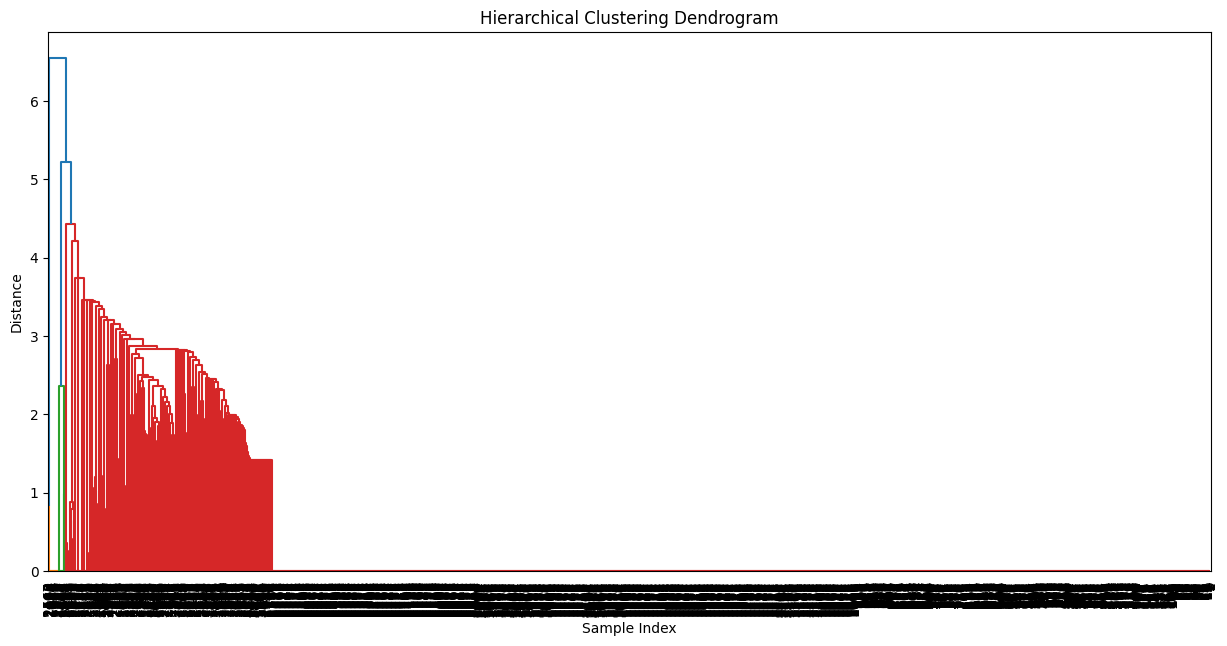

In [49]:
hierarchical_clustering_dendrogram(X= X_normalized_2)

In [50]:
from sklearn.decomposition import LatentDirichletAllocation

lda_2 = LatentDirichletAllocation(n_components=5, random_state=42)
lda_2.fit(X= X_normalized_2)

# Display top words in each topic
def display_topics(model, feature_names, num_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[-num_words:]]))
        print()

tfidf_feature_names_2 = vectorizer_2.get_feature_names_out()
display_topics(lda_2, tfidf_feature_names_2, 10)


Topic 1:
ex gay ministry gamma ray burst command loss timer digital image processing earth magnetic field long time ago space station redesign vnet ibm com gamma ray burster help greatly appreciated

Topic 2:
ball live real safety people ball real world mary shafer nasa ames world mary shafer nasa ames dryden people ball live perfect safety people insisting perfect safety mary shafer nasa

Topic 3:
national air space support bit color bit pixel bit sci space news true color image space flight center sky look like alt binaries pictures available anonymous ftp help appreciated thanks

Topic 4:
right dark sky san jose ca tom mcwilliams wk ibm cl msu msu edu hm tommy mac tom tm ibm cl mac tom mcwilliams cl msu edu pluto fast flyby

Topic 5:
kjenks gothamcity jsc shuttle program office world std com vesa local bus thanks advance help jsc nasa gov space shuttle program ___ ___ ___ hidden line removal low earth orbit

